# Clearwater State University: Modelling Early Attrition 

### Key Strategic Goals

* Increase enrolment of students
* Improve retention, progression and graduation rates
* Recruit better qualified UG and PG students
* Increase external funding and recognition

### Business Questions

* Identify key drivers of student attrition: EDA. How does student attrition change across various combinations of student characteristics? Perform objective segmentation or discriminant analysis

* Build a predictive model to identify students with high early attrition risk: Try different models and see which ones perform optimally. Validate model

* Recommend appropriate interventions based on the analysis: Based on the model results from the previous question.

### Deliverables
    
Need to submit well documented code and main takeaways and insights gained through the analysis

* Exploratory Data Analysis showing key associations
* Segment analysis showing key drivers of association
* Results of statistical modl along with business interpretations and recommend interventions

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%run dqr.py

In [3]:
#Importing data
data = pd.read_excel("data.xlsx")

In [4]:
data.shape

(3400, 56)

In [5]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [6]:
#Data Quality Report
report = dataQuality(data)

In [7]:
#Numerical features report
report["numeric"]

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Var,Q1,Q3,q99
STUDENT IDENTIFIER,3400.0,3400.0,0.000000,7755837.0,8037098.0,7.897155e+06,7899052.5,80834.212657,6.534170e+09,7827039.25,7964008.00,8034112.56
STDNT_AGE,3400.0,11.0,0.000000,16.0,26.0,1.799412e+01,18.0,0.552052,3.047609e-01,18.00,18.00,19.00
STDNT_TEST_ENTRANCE1,1106.0,24.0,0.674706,8.0,32.0,2.066004e+01,20.0,3.234734,1.046351e+01,18.00,22.00,30.00
STDNT_TEST_ENTRANCE2,2492.0,110.0,0.267059,350.0,1490.0,9.650923e+02,990.0,209.088633,4.371806e+04,900.00,1100.00,1350.90
STDNT_TEST_ENTRANCE_COMB,2882.0,25.0,0.152353,530.0,1510.0,9.977585e+02,990.0,156.268221,2.441976e+04,910.00,1110.00,1340.00
FIRST_TERM,3400.0,6.0,0.000000,200508.0,201008.0,2.007770e+05,200808.0,170.001298,2.890044e+04,200608.00,200908.00,201008.00
SECOND_TERM,3400.0,6.0,0.000000,200602.0,201102.0,2.008710e+05,200902.0,170.001298,2.890044e+04,200702.00,201002.00,201102.00
RETURNED_2ND_YR,3400.0,2.0,0.000000,0.0,1.0,7.873529e-01,1.0,0.409240,1.674775e-01,1.00,1.00,1.00
DISTANCE_FROM_HOME,3375.0,72.0,0.007353,0.0,5932.0,9.982519e+01,69.0,235.196984,5.531762e+04,69.00,138.00,666.00
HIGH_SCHL_GPA,3347.0,201.0,0.015588,0.0,4.0,3.202738e+00,3.2,0.455337,2.073318e-01,2.87,3.56,4.00


In [8]:
#Categorical data quality report
report["categorical"]

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
STDNT_GENDER,3400,2,0,F,0.629412
STDNT_BACKGROUND,3400,8,0,BGD 1,0.612353
IN_STATE_FLAG,3400,2,0,Y,0.900882
INTERNATIONAL_STS,3400,2,0,N,0.992059
STDNT_MAJOR,3400,54,0,Undeclared,0.135294
STDNT_MINOR,3400,37,0,N,0.929412
CORE_COURSE_NAME_1_F,3400,69,0,ENGL 1101,0.183529
CORE_COURSE_GRADE_1_F,3400,7,0,C,0.301176
CORE_COURSE_NAME_2_F,3301,75,0.0291176,ENGL 1101,0.216471
CORE_COURSE_GRADE_2_F,3301,8,0.0291176,B,0.393824


In this project, variables with more than 10% missing values will be dropped. This will be done before continuing with the EDA. This will allow the more important variables to be examined and studied. 

In [9]:
data.isnull().sum()/data.shape[0]

STUDENT IDENTIFIER          0.000000
STDNT_AGE                   0.000000
STDNT_GENDER                0.000000
STDNT_BACKGROUND            0.000000
IN_STATE_FLAG               0.000000
INTERNATIONAL_STS           0.000000
STDNT_MAJOR                 0.000000
STDNT_MINOR                 0.000000
STDNT_TEST_ENTRANCE1        0.674706
STDNT_TEST_ENTRANCE2        0.267059
STDNT_TEST_ENTRANCE_COMB    0.152353
FIRST_TERM                  0.000000
CORE_COURSE_NAME_1_F        0.000000
CORE_COURSE_GRADE_1_F       0.000000
CORE_COURSE_NAME_2_F        0.029118
CORE_COURSE_GRADE_2_F       0.029118
CORE_COURSE_NAME_3_F        0.166176
CORE_COURSE_GRADE_3_F       0.166176
CORE_COURSE_NAME_4_F        0.469706
CORE_COURSE_GRADE_4_F       0.469706
CORE_COURSE_NAME_5_F        0.810294
CORE_COURSE_GRADE_5_F       0.810294
CORE_COURSE_NAME_6_F        0.962353
CORE_COURSE_GRADE_6_F       0.962353
SECOND_TERM                 0.000000
CORE_COURSE_NAME_1_S        0.046176
CORE_COURSE_GRADE_1_S       0.068235
C

In [10]:
#Deleting variables with more than 10% missing values
missing_variables = []

for variable in data.columns.tolist():
    
    if data[variable].isnull().sum()/data.shape[0] > 0.1:
        
        missing_variables.append(variable)

In [11]:
data.drop(missing_variables, inplace = True, axis = 1)

In [12]:
data.columns.tolist()

['STUDENT IDENTIFIER',
 'STDNT_AGE',
 'STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'FIRST_TERM',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'SECOND_TERM',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'HOUSING_STS',
 'RETURNED_2ND_YR',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED']

### Examining Target/Dependent variable

The target variable for this project is <b>RETURNED_2ND_YR</b>.

In [13]:
data["RETURNED_2ND_YR"].value_counts()/data.shape[0]

1    0.787353
0    0.212647
Name: RETURNED_2ND_YR, dtype: float64

* Firstly, the numerical feature report illustrates that the target variable has no missing values. 

* Secondly, the value counts show that there is a class imbalance. This must be taken into consideration when building the predictive model (i.e. need to choose models that are not affected by class imbalance (like ensemble models)).

* The goal of the predictive model is to predict whether a student will attrite or not. Therefore, the 1s and 0s in the target variables need to be switched. This is done below.

In [14]:
data["RETURNED_2ND_YR"] = data["RETURNED_2ND_YR"].apply(lambda x: 1 if x == 0 else 0)

The new counts are shown below

In [15]:
data["RETURNED_2ND_YR"].value_counts()/data.shape[0]

0    0.787353
1    0.212647
Name: RETURNED_2ND_YR, dtype: float64

The university has an attrition rate of 21%.

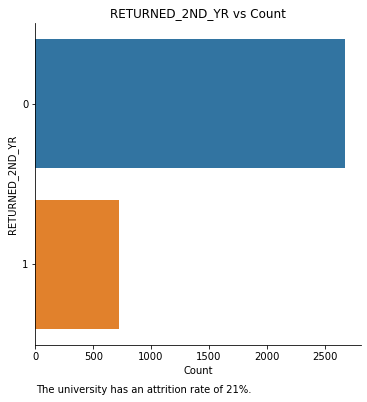

In [16]:
sns.catplot(y="RETURNED_2ND_YR", data=data, kind = "count")
plt.title("RETURNED_2ND_YR vs Count")
plt.xlabel("Count")
plt.text(6.5,1.8, "The university has an attrition rate of 21%.")
plt.show()

### Examining Independent Variables

When analysing independent variables, features will be chosen that are:

* <b>Informative</b>
* <b>Independent</b>
* <b>Simple</b>

### Qualitative Data

#### STUDENT IDENTIFIER

In [17]:
data["STUDENT IDENTIFIER"].nunique()

3400

Due to its high cardinality, this variable will be dropped. Variables with high cardinality are not informative.

In [18]:
data.drop("STUDENT IDENTIFIER", inplace = True, axis = 1)

#### STDNT_GENDER

In [19]:
data["STDNT_GENDER"].value_counts()/data.shape[0]

F    0.629412
M    0.370588
Name: STDNT_GENDER, dtype: float64

In [20]:
data["STDNT_GENDER"].value_counts()

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

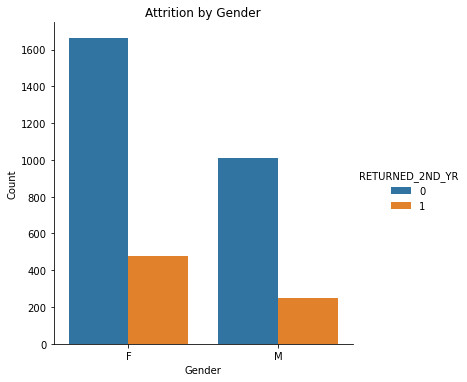

In [21]:
sns.catplot(x="STDNT_GENDER", data=data, kind = "count", hue = "RETURNED_2ND_YR")
plt.title("Attrition by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

In [22]:
#Examining relationship between student gender and attrition rate
pd.crosstab(data["RETURNED_2ND_YR"], data["STDNT_GENDER"], margins = True)/data.shape[0]

STDNT_GENDER,F,M,All
RETURNED_2ND_YR,,,
0,0.489706,0.297647,0.787353
1,0.139706,0.072941,0.212647
All,0.629412,0.370588,1.000000


In [23]:
print(f"Proportion of females who drop out = {475/2141}.")
print(f"Proportion of males who drop out = {248/1260}.")

Proportion of females who drop out = 0.22185894441849602.
Proportion of males who drop out = 0.19682539682539682.


The result above shows that the attrition rate does not differ significantly across genders. However, gender is an important attribute and will be kept in the model. 

<b>Note:</b> This variable will need to be encoded. 1s will be assigned to all instances of males and 0s to females. This is shown below.

In [24]:
data["STDNT_GENDER"] = data["STDNT_GENDER"].apply(lambda x: 1 if x == "M" else 0)

#### STDNT_BACKGROUND

In [25]:
data["STDNT_BACKGROUND"].value_counts()/data.shape[0]

BGD 1    0.612353
BGD 3    0.278529
BGD 4    0.040882
BGD 2    0.031176
BGD 6    0.027647
BGD 7    0.005588
BGD 5    0.002353
BGD 8    0.001471
Name: STDNT_BACKGROUND, dtype: float64

In [26]:
#Examining relationship between student background and attrition
pd.crosstab(data["RETURNED_2ND_YR"], data["STDNT_BACKGROUND"], margins = True)

STDNT_BACKGROUND,BGD 1,BGD 2,BGD 3,BGD 4,BGD 5,BGD 6,BGD 7,BGD 8,All
RETURNED_2ND_YR,,,,,,,,,
0,1605,82,777,113,4,80,12,4,2677
1,477,24,170,26,4,14,7,1,723
All,2082,106,947,139,8,94,19,5,3400


In [27]:
print(f"Proportion of BGD 1 students who drop out = {477/2082}.")
print(f"Proportion of BGD 2 students who drop out = {24/106}.")
print(f"Proportion of BGD 3 students who drop out = {170/947}.")
print(f"Proportion of BGD 4 students who drop out = {26/139}.")
print(f"Proportion of BGD 5 students who drop out = {4/8}.")
print(f"Proportion of BGD 6 students who drop out = {14/94}.")
print(f"Proportion of BGD 7 students who drop out = {7/19}.")
print(f"Proportion of BGD 8 students who drop out = {1/5}.")

Proportion of BGD 1 students who drop out = 0.22910662824207492.
Proportion of BGD 2 students who drop out = 0.22641509433962265.
Proportion of BGD 3 students who drop out = 0.1795142555438226.
Proportion of BGD 4 students who drop out = 0.18705035971223022.
Proportion of BGD 5 students who drop out = 0.5.
Proportion of BGD 6 students who drop out = 0.14893617021276595.
Proportion of BGD 7 students who drop out = 0.3684210526315789.
Proportion of BGD 8 students who drop out = 0.2.


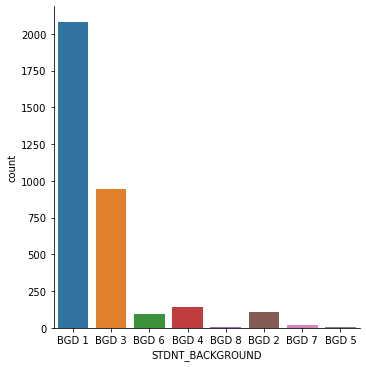

In [28]:
sns.catplot(x = "STDNT_BACKGROUND", data=data, kind = "count")

This variable can be engineered as follows: create one bucket for BGD 1 and another bucket for the other categories.

In [29]:
data["STDNT_BACKGROUND"] = data["STDNT_BACKGROUND"].apply(lambda x: "BGD 1" if x == "BGD 1" else "OTHER")

In [30]:
pd.crosstab(data["RETURNED_2ND_YR"], data["STDNT_BACKGROUND"], margins = True)

STDNT_BACKGROUND,BGD 1,OTHER,All
RETURNED_2ND_YR,,,
0,1605,1072,2677
1,477,246,723
All,2082,1318,3400


In [31]:
print(f"Proportion of BGD 1 students who drop out = {477/2082}.")
print(f"Proportion of OTHER students who drop out = {246/1318}.")

Proportion of BGD 1 students who drop out = 0.22910662824207492.
Proportion of OTHER students who drop out = 0.18664643399089528.


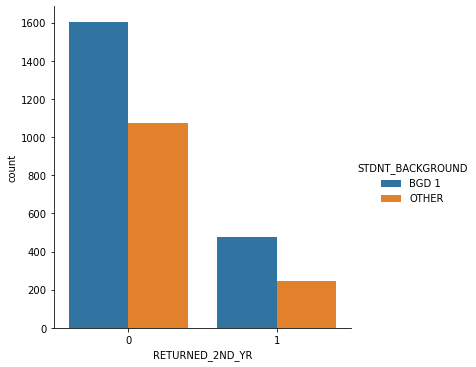

In [32]:
sns.catplot(x="RETURNED_2ND_YR", hue = "STDNT_BACKGROUND", data=data, kind = "count")

From the graph above, it is difficult to ascertain whether backgrounds are associated with student attrition. The results from the cross-tabulation show that 23% of students from BGD 1 drop out, compared to 19% from the other backgrounds. While this difference may seem negligible, it significantly reduces the number of bins, making the final model more efficient.

#### IN_STATE_FLAG

In [33]:
data["IN_STATE_FLAG"].value_counts()/data.shape[0]

Y    0.900882
N    0.099118
Name: IN_STATE_FLAG, dtype: float64

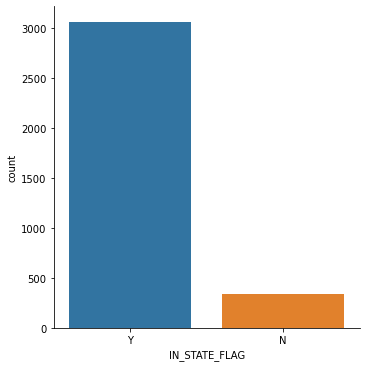

In [34]:
sns.catplot(x="IN_STATE_FLAG", data=data, kind = "count")

In [35]:
#Examining relationship between in state flag and attrition
pd.crosstab(data["RETURNED_2ND_YR"], data["IN_STATE_FLAG"], margins = True)

IN_STATE_FLAG,N,Y,All
RETURNED_2ND_YR,,,
0,248,2429,2677
1,89,634,723
All,337,3063,3400


26% of students who are not from the state drop out, compared to 21% for students from the state. As was the case with gender, this seems like an informative feature to have for the model - as it is an important statistic for universities. 

<b>Note:</b> This variable will need to be encoded when used in the model.

In [36]:
data["IN_STATE_FLAG"] = data["IN_STATE_FLAG"].apply(lambda x: 1 if x == "Y" else 0)

#### INTERNATIONAL_STS

In [37]:
data["INTERNATIONAL_STS"].value_counts()/data.shape[0]

N    0.992059
Y    0.007941
Name: INTERNATIONAL_STS, dtype: float64

In [38]:
#Examining the relationship between international students and attrition rate
pd.crosstab(data["RETURNED_2ND_YR"], data["INTERNATIONAL_STS"], margins = True)

INTERNATIONAL_STS,N,Y,All
RETURNED_2ND_YR,,,
0,2662,15,2677
1,711,12,723
All,3373,27,3400


Almost 40% of international students who attend the university drop out. While the total number of international students itself is very low, this is an interesting finding, and may of use to the university. 

<b>Note:</b> This variable will need to be encoded.

In [39]:
data["INTERNATIONAL_STS"] = data["INTERNATIONAL_STS"].apply(lambda x: 1 if x == "Y" else 0)

#### STDNT_MAJOR

In [40]:
data["STDNT_MAJOR"].nunique()

54

In [41]:
data["STDNT_MAJOR"].value_counts()

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Chemistry                          64
Political Science                  64
Engineering Studies                60
English Language/Literature        60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

One method of engineering this variable would be to assign bins according the respective schools of the subject (i.e. Mathematics&Sciences, Education, English&Arts&Languages, etc.). While a tedious task, knowledge of student performance across various schools can be very useful to the university.

In [42]:
#Binning the Student Major Variables: Separating majors into UNDECLARED/MATHEMATICS & SCIENCES/ENGLISH 
MS = ["Biology", "Pre-Nursing", "Nursing", "Exercise Science", "Chemistry",
     "Engineering Studies", "Computer Science - Systems", "Accounting", "Health Science",
     "Computer Science - Games", "Join Enrollment - Accel", "Applied Computer Science",
     "Pre-Engineering/RETP", "Mathematics", "Management Information Systems", "Information Technology",
     "Geology", "Early Admission - Accel", "Earth and Space Science"]


EAL = ["Theatre Arts", "Musical Performance", "Art", "English Language/Literature", "Music",
      "Spec Ed: Gen. Curr. - Reading", "Spanish", "French", "Liberal Arts"]

BMS = ["Pre-Business", "Criminal Justice", "General Business", "Management", "Communication",
      "Political Science", "Marketing", "History", "Finance", "Sociology", "General Studies/AS", "Psychology"]

EDU = ["Early Childhood Education", "Music Education", "Theatre Education", "English and Secondary Education",
      "History and Secondary Education", "Health and Physical Education", "Middle Grades Education",
      "Mathematics and Secondary Ed", "Art Education", "Biology and Secondary Ed", "Spanish with Teacher Cert",
      "French with Teacher Cert", "Chemistry and Secondary Ed"]

#Function to bin Student Majors
def subject_binning(item):
        
        if item in MS:
            
            return "MS"
        
        elif item in EAL:
            
            return "EAL"
        
        elif item in BMS:
            
            return "BMS"
        
        elif item in EDU:
            
            return "EDU"
        
        elif item == "Undeclared":
            
            return "Undeclared"

In [43]:
data["STDNT_MAJOR"] = data["STDNT_MAJOR"].map(subject_binning)

In [44]:
data["STDNT_MAJOR"].value_counts()/data.shape[0]

MS            0.362647
BMS           0.242647
Undeclared    0.135294
EDU           0.113824
EAL           0.090000
Name: STDNT_MAJOR, dtype: float64

In [45]:
#Examining the affects of student major on attrition rate 
pd.crosstab(data["RETURNED_2ND_YR"], data["STDNT_MAJOR"], margins = True)

STDNT_MAJOR,BMS,EAL,EDU,MS,Undeclared,All
RETURNED_2ND_YR,,,,,,
0,629,257,323,953,349,2511
1,196,49,64,280,111,700
All,825,306,387,1233,460,3211


Text(19.714826388888895, 0.5, 'Count')

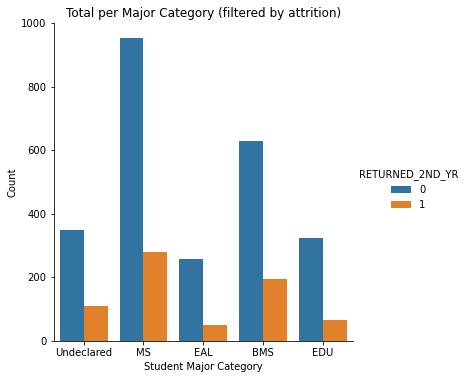

In [46]:
sns.catplot(x = "STDNT_MAJOR", data = data, kind = 'count', hue = "RETURNED_2ND_YR")
plt.title("Total per Major Category (filtered by attrition)")
plt.xlabel("Student Major Category")
plt.ylabel("Count")

Text(-2.700000000000003, 0.5, 'Count')

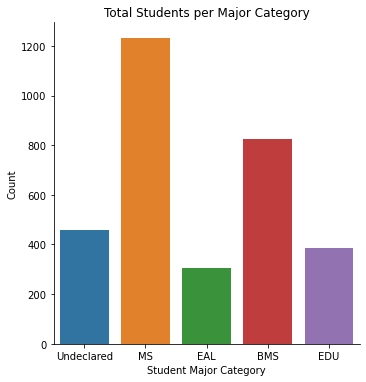

In [47]:
sns.catplot(x = "STDNT_MAJOR", data = data, kind = 'count')
plt.title("Total Students per Major Category")
plt.xlabel("Student Major Category")
plt.ylabel("Count")

The results to the left show the following:

* <b>BMS</b> - 23.7% drop-out rate
* <b>EAL</b> - 16.7% drop-out rate
* <b>EDU</b> - 16.5% drop-out rate
* <b>MS</b> - 22.7% drop-out rate
* <b>Undeclared</b> - 24% drop-out rate

#### STDNT_MINOR

In [48]:
data["STDNT_MINOR"].value_counts()/data.shape[0]

N                                0.929412
Spanish                          0.007647
Psychology                       0.005588
Music                            0.005588
Foundations of Business          0.004412
Communication                    0.004118
History                          0.003824
Theatre Arts                     0.003529
Criminal Justice                 0.003529
Computer Science - Systems       0.002941
Early Childhood Education        0.002647
Mathematics                      0.002059
Art History                      0.001765
Marketing                        0.001765
Professional Writing             0.001765
Sociology                        0.001471
English Language/Literature      0.001471
Art                              0.001471
Chemistry                        0.001176
Biology                          0.001176
Accounting                       0.001176
Political Science                0.001176
French                           0.001176
International Business           0

This variables can be engineered as follows: one bucket for N and another for the rest of the minor subjects.

In [49]:
data["STDNT_MINOR"] = data["STDNT_MINOR"].apply(lambda x: "N" if x == "N" else "OTHER")

In [50]:
data["STDNT_MINOR"].value_counts()/data.shape[0]

N        0.929412
OTHER    0.070588
Name: STDNT_MINOR, dtype: float64

In [51]:
pd.crosstab(data["RETURNED_2ND_YR"], data["STDNT_MINOR"], margins = True)

STDNT_MINOR,N,OTHER,All
RETURNED_2ND_YR,,,
0,2485,192,2677
1,675,48,723
All,3160,240,3400


In [52]:
print(f"Drop out rate of students with undeclared minor = {675/3160}.")
print(f"Drop out rate of students with declared minor = {48/240}.")

Drop out rate of students with undeclared minor = 0.21360759493670886.
Drop out rate of students with declared minor = 0.2.


There is no discernable difference between the two categories. This variable can be dropped. 

#### CORE_COURSE_NAME & CORE_COURSE_GRADE

After dropping variables with more than 10% missing values, the following variables remained:

* <b>CORE_COURSE_NAME_1_F</b>
* <b>CORE_COURSE_GRADE_1_F</b>
* <b>CORE_COURSE_NAME_2_F</b>
* <b>CORE_COURSE_GRADE_2_F</b>
* <b>CORE_COURSE_NAME_1_S</b>
* <b>CORE_COURSE_GRADE_1_S</b>

The name variables will all be dropped. The subjects associated with each student have been captured in the <b>STDNT_MAJOR</b> feature. 

In [53]:
data.drop(["CORE_COURSE_NAME_1_F", "CORE_COURSE_NAME_2_F", "CORE_COURSE_NAME_1_S"], axis = 1, inplace = True)

#### CORE_COURSE_GRADE_1_F

In [54]:
data["CORE_COURSE_GRADE_1_F"].value_counts()/data.shape[0]

C          0.301176
B          0.276765
D          0.158235
F          0.129412
A          0.094706
NOT REP    0.031176
INCOMPL    0.008529
Name: CORE_COURSE_GRADE_1_F, dtype: float64

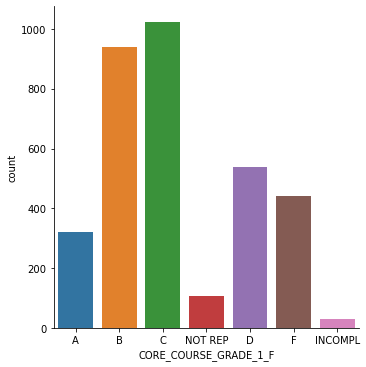

In [55]:
sns.catplot(x = "CORE_COURSE_GRADE_1_F", kind = "count", data = data)

In [56]:
pd.crosstab(data["RETURNED_2ND_YR"], data["CORE_COURSE_GRADE_1_F"], margins = True)

CORE_COURSE_GRADE_1_F,A,B,C,D,F,INCOMPL,NOT REP,All
RETURNED_2ND_YR,,,,,,,,
0,264,811,821,389,285,21,86,2677
1,58,130,203,149,155,8,20,723
All,322,941,1024,538,440,29,106,3400


In [57]:
print(f"Drop out rate of A students = {58/322}.")
print(f"Drop out rate of B students = {130/941}.")
print(f"Drop out rate of C students = {203/1024}.")
print(f"Drop out rate of D students = {149/538}.")
print(f"Drop out rate of F students = {155/440}.")
print(f"Drop out rate of IMCOMPL students = {8/29}.")
print(f"Drop out rate of NOT REP students = {20/106}.")

Drop out rate of A students = 0.18012422360248448.
Drop out rate of B students = 0.1381509032943677.
Drop out rate of C students = 0.1982421875.
Drop out rate of D students = 0.27695167286245354.
Drop out rate of F students = 0.3522727272727273.
Drop out rate of IMCOMPL students = 0.27586206896551724.
Drop out rate of NOT REP students = 0.18867924528301888.


#### CORE_COURSE_GRADE_2_F

In [58]:
data["CORE_COURSE_GRADE_2_F"].value_counts()/data.shape[0]

B          0.393824
C          0.233824
A          0.219118
D          0.085882
F          0.036176
INCOMPL    0.001176
NOT REP    0.000882
Name: CORE_COURSE_GRADE_2_F, dtype: float64

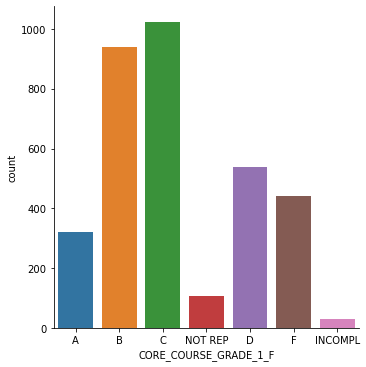

In [59]:
sns.catplot(x = "CORE_COURSE_GRADE_1_F", kind = "count", data = data)

In [60]:
pd.crosstab(data["RETURNED_2ND_YR"], data["CORE_COURSE_GRADE_2_F"], margins = True)

CORE_COURSE_GRADE_2_F,A,B,C,D,F,INCOMPL,NOT REP,All
RETURNED_2ND_YR,,,,,,,,
0,632,1105,581,209,66,2,3,2598
1,113,234,214,83,57,2,0,703
All,745,1339,795,292,123,4,3,3301


In [61]:
print(f"Drop out rate of A students = {113/745}.")
print(f"Drop out rate of B students = {234/1339}.")
print(f"Drop out rate of C students = {214/795}.")
print(f"Drop out rate of D students = {83/292}.")
print(f"Drop out rate of F students = {57/123}.")
print(f"Drop out rate of IMCOMPL students = {2/4}.")
print(f"Drop out rate of NOT REP students = {0/3}.")

Drop out rate of A students = 0.15167785234899328.
Drop out rate of B students = 0.17475728155339806.
Drop out rate of C students = 0.2691823899371069.
Drop out rate of D students = 0.2842465753424658.
Drop out rate of F students = 0.4634146341463415.
Drop out rate of IMCOMPL students = 0.5.
Drop out rate of NOT REP students = 0.0.


Unsurprisingly, worse performing students have a higher probability of dropping out. 

#### CORE_COURSE_GRADE_1_S

In [62]:
data["CORE_COURSE_GRADE_1_S"].value_counts()/data.shape[0]

C          0.266471
B          0.263529
D          0.147353
F          0.123824
A          0.107647
NOT REP    0.013824
INCOMPL    0.007647
Unknown    0.001471
Name: CORE_COURSE_GRADE_1_S, dtype: float64

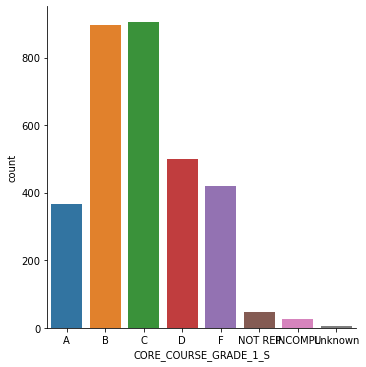

In [63]:
sns.catplot(x = "CORE_COURSE_GRADE_1_S", kind = "count", data = data)

In [64]:
pd.crosstab(data["RETURNED_2ND_YR"], data["CORE_COURSE_GRADE_1_S"], margins = True)

CORE_COURSE_GRADE_1_S,A,B,C,D,F,INCOMPL,NOT REP,Unknown,All
RETURNED_2ND_YR,,,,,,,,,
0,315,795,778,401,289,15,41,0,2634
1,51,101,128,100,132,11,6,5,534
All,366,896,906,501,421,26,47,5,3168


In [65]:
print(f"Drop out rate of A students = {51/366}.")
print(f"Drop out rate of B students = {101/896}.")
print(f"Drop out rate of C students = {128/906}.")
print(f"Drop out rate of D students = {100/501}.")
print(f"Drop out rate of F students = {132/421}.")
print(f"Drop out rate of IMCOMPL students = {11/26}.")
print(f"Drop out rate of NOT REP students = {6/47}.")
print(f"Drop out rate of Unknown students = {5/5}.")

Drop out rate of A students = 0.13934426229508196.
Drop out rate of B students = 0.11272321428571429.
Drop out rate of C students = 0.141280353200883.
Drop out rate of D students = 0.1996007984031936.
Drop out rate of F students = 0.31353919239904987.
Drop out rate of IMCOMPL students = 0.4230769230769231.
Drop out rate of NOT REP students = 0.1276595744680851.
Drop out rate of Unknown students = 1.0.


A very interesting finding has occured with the grade variables. For CORE_COURSE_GRADE_1_F and CORE_COURSE_GRADE_1_S it is found that students with As have a higher drop out rate than students with Bs. Then as expected, as the grades get worse, drop-out rates increase. 

How can this be explained?

In certain countries, students are allowed to transfer to other universities. One possible explanation for this finding is that better performing students transfer to better universities.

The variable will be engineered as follows:

In [66]:
def grade_binner(x):
    
    if x == "A":
        
        return "A"
    
    elif x == "B":
        
        return "B"
    
    elif x == "C":
        
        return "C"
    
    elif x == "D":
        
        return "D"
    
    else:
        
        return "F&OTHER"

In [67]:
data["CORE_COURSE_GRADE_1_F"] = data["CORE_COURSE_GRADE_1_F"].map(grade_binner)
data["CORE_COURSE_GRADE_2_F"] = data["CORE_COURSE_GRADE_2_F"].map(grade_binner)
data["CORE_COURSE_GRADE_1_S"] = data["CORE_COURSE_GRADE_1_S"].map(grade_binner)

#### HOUSING_STS

In [68]:
data["HOUSING_STS"].value_counts()/data.shape[0]

Off Campus    0.582647
On Campus     0.417353
Name: HOUSING_STS, dtype: float64

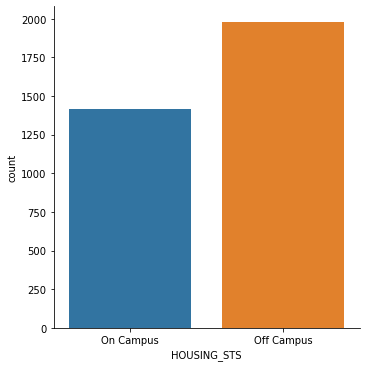

In [69]:
sns.catplot(x="HOUSING_STS", data=data, kind = "count")

In [70]:
#Examining the affect of housing status on drop-out rate
pd.crosstab(data["RETURNED_2ND_YR"], data["HOUSING_STS"], margins = True)

HOUSING_STS,Off Campus,On Campus,All
RETURNED_2ND_YR,,,
0,1592,1085,2677
1,389,334,723
All,1981,1419,3400


In [71]:
print(f"Proportion of off-campus students who drop out = {389/1981}.")
print(f"Proportion of on-campus students who drop out = {334/1419}.")

Proportion of off-campus students who drop out = 0.19636547198384655.
Proportion of on-campus students who drop out = 0.23537702607470048.


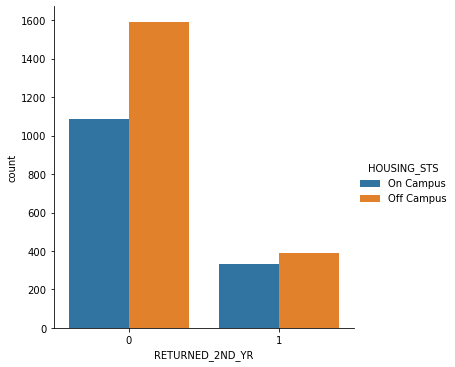

In [72]:
sns.catplot(x="RETURNED_2ND_YR", hue = "HOUSING_STS", data=data, kind = "count")

The results above show the following drop-out rates according to student accommodation:

* <b>On-campus:</b> 24%
* <b>Off-camplus:</b> 20%

<b>Note:</b> This variable can be encoded as follows:

In [73]:
data["HOUSING_STS"] = data["HOUSING_STS"].apply(lambda x: 1 if x == "On Campus" else 0)

#### DEGREE_GROUP_CD & DEGREE_GROUP_DESC

In [74]:
data["DEGREE_GROUP_CD"].value_counts()/data.shape[0]

B    0.995294
A    0.003529
V    0.001176
Name: DEGREE_GROUP_CD, dtype: float64

In [75]:
data["DEGREE_GROUP_DESC"].value_counts()/data.shape[0]

Bachelors           0.995294
Associate           0.003529
Career Associate    0.001176
Name: DEGREE_GROUP_DESC, dtype: float64

Both these variables are identical, one of them will be dropped.

In [76]:
data.drop("DEGREE_GROUP_CD", axis = 1, inplace = True)

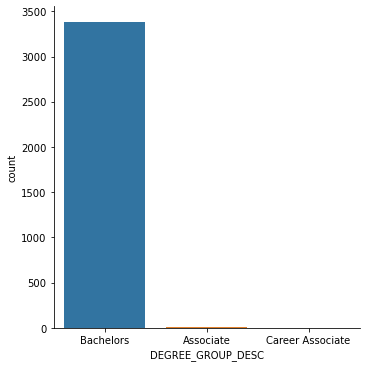

In [77]:
sns.catplot(x="DEGREE_GROUP_DESC", data=data, kind = "count")

In [78]:
#Examining the affects of degree group on attrition rate
pd.crosstab(data["RETURNED_2ND_YR"], data["DEGREE_GROUP_DESC"], margins = True)

DEGREE_GROUP_DESC,Associate,Bachelors,Career Associate,All
RETURNED_2ND_YR,,,,
0,10,2664,3,2677
1,2,720,1,723
All,12,3384,4,3400


In [79]:
print(f"Proportion of Associate students who drop out = {2/12}.")
print(f"Proportion of Bachelors students who drop out = {720/3384}.")
print(f"Proportion of Career Associate students who drop out = {1/4}.")

Proportion of Associate students who drop out = 0.16666666666666666.
Proportion of Bachelors students who drop out = 0.2127659574468085.
Proportion of Career Associate students who drop out = 0.25.


#### FATHER_HI_EDU_DESC & MOTHER_HI_EDU_DESC

In [80]:
data["FATHER_HI_EDU_DESC"].value_counts()

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [81]:
pd.crosstab(data["RETURNED_2ND_YR"], data["FATHER_HI_EDU_DESC"], margins = True)

FATHER_HI_EDU_DESC,College/Beyond,High School,Middle School/Junior High,No Information,Other/Unknown,All
RETURNED_2ND_YR,,,,,,
0,1052,1047,71,329,178,2677
1,257,289,26,103,48,723
All,1309,1336,97,432,226,3400


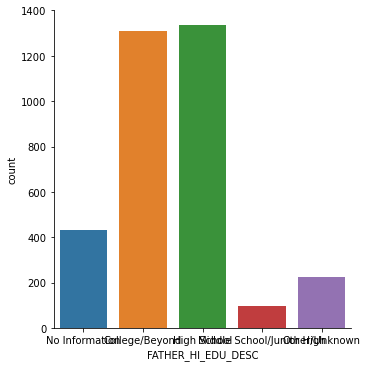

In [82]:
sns.catplot(x="FATHER_HI_EDU_DESC", data=data, kind = "count")

In [83]:
data["MOTHER_HI_EDU_DESC"].value_counts()

College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [84]:
pd.crosstab(data["RETURNED_2ND_YR"], data["MOTHER_HI_EDU_DESC"], margins = True)

MOTHER_HI_EDU_DESC,College/Beyond,High School,Middle School/Junior High,No Information,Other/Unknown,All
RETURNED_2ND_YR,,,,,,
0,1199,958,55,366,99,2677
1,301,265,16,123,18,723
All,1500,1223,71,489,117,3400


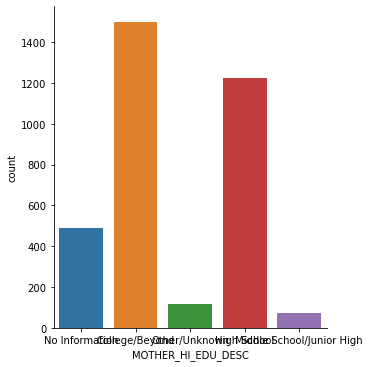

In [85]:
sns.catplot(x="MOTHER_HI_EDU_DESC", data=data, kind = "count")

Due to the low occurences frequences of the categories "No Information", "Middle School/Junior High" and "Other Unknown", these will be grouped together in one bin.

In [86]:
def edu_binning(x):
    
    if x == "College/Beyond":
        
        return "College/Beyond"
    
    elif x == "High School":
        
        return "High School"
    
    else:
        
        return "OTHER"

In [87]:
data["FATHER_HI_EDU_DESC"] = data["FATHER_HI_EDU_DESC"].map(edu_binning)

In [88]:
data["MOTHER_HI_EDU_DESC"] = data["MOTHER_HI_EDU_DESC"].map(edu_binning)

In [89]:
#Examining a combination of the two variables
parents_higher_educated = data.query("((FATHER_HI_EDU_DESC == 'College/Beyond') or (FATHER_HI_EDU_DESC == 'High School'))  & ((MOTHER_HI_EDU_DESC == 'College/Beyond') or (MOTHER_HI_EDU_DESC == 'High School'))")
parents_higher_educated["RETURNED_2ND_YR"].value_counts()/parents_higher_educated.shape[0]

0    0.792514
1    0.207486
Name: RETURNED_2ND_YR, dtype: float64

In [90]:
parents_other_educated = data.query("FATHER_HI_EDU_DESC == 'OTHER' & MOTHER_HI_EDU_DESC == 'OTHER'")
parents_other_educated["RETURNED_2ND_YR"].value_counts()/parents_other_educated.shape[0]

0    0.753061
1    0.246939
Name: RETURNED_2ND_YR, dtype: float64

Students whose parents' education statuses fall in OTHER are more likely to drop out.

#### STDNT_MINOR

In [91]:
data["STDNT_MINOR"].value_counts()/data.shape[0]

N        0.929412
OTHER    0.070588
Name: STDNT_MINOR, dtype: float64

This variable can be binned as follows:

In [92]:
data["STDNT_MINOR"] = data["STDNT_MINOR"].apply(lambda x: "N" if x == "N" else "OTHER")

In [93]:
data["STDNT_MINOR"].value_counts()/data.shape[0]

N        0.929412
OTHER    0.070588
Name: STDNT_MINOR, dtype: float64

In [94]:
pd.crosstab(data["RETURNED_2ND_YR"], data["STDNT_MINOR"], margins = True)

STDNT_MINOR,N,OTHER,All
RETURNED_2ND_YR,,,
0,2485,192,2677
1,675,48,723
All,3160,240,3400


In [95]:
print(f"Drop out rate of students with undeclared minor = {675/3160}.")
print(f"Drop out rate of students with declared minor = {48/240}.")

Drop out rate of students with undeclared minor = 0.21360759493670886.
Drop out rate of students with declared minor = 0.2.


Results show no discernable difference. This variable can be dropped.

All the qualitative variables have been explored. To examine the affects that they have collectively on the target variable, chi-squared testing can be done, as this data is count data. 

Before starting with this, some sanity checks need to be done, especially missing value treatment. Missing values will be treated as follows:

* <b>Qualitative:</b> fill missing values with most frequently occuring values.
* <b>Quantitative:</b> fill missing values with median values

In [96]:
data.isnull().sum()/data.shape[0]

STDNT_AGE                  0.000000
STDNT_GENDER               0.000000
STDNT_BACKGROUND           0.000000
IN_STATE_FLAG              0.000000
INTERNATIONAL_STS          0.000000
STDNT_MAJOR                0.055588
STDNT_MINOR                0.000000
FIRST_TERM                 0.000000
CORE_COURSE_GRADE_1_F      0.000000
CORE_COURSE_GRADE_2_F      0.000000
SECOND_TERM                0.000000
CORE_COURSE_GRADE_1_S      0.000000
HOUSING_STS                0.000000
RETURNED_2ND_YR            0.000000
DISTANCE_FROM_HOME         0.007353
HIGH_SCHL_GPA              0.015588
HIGH_SCHL_NAME             0.000294
FATHER_HI_EDU_DESC         0.000000
MOTHER_HI_EDU_DESC         0.000000
DEGREE_GROUP_DESC          0.000000
FIRST_TERM_ATTEMPT_HRS     0.000000
FIRST_TERM_EARNED_HRS      0.000000
SECOND_TERM_ATTEMPT_HRS    0.060588
SECOND_TERM_EARNED_HRS     0.061471
GROSS_FIN_NEED             0.000000
COST_OF_ATTEND             0.000000
EST_FAM_CONTRIBUTION       0.000000
UNMET_NEED                 0

In [97]:
#Imputing missing values
data["CORE_COURSE_GRADE_2_F"].fillna("B", inplace = True)

In [98]:
data["CORE_COURSE_GRADE_1_S"].fillna("C", inplace = True)

In [99]:
data["DISTANCE_FROM_HOME"].fillna(69, inplace = True)

In [100]:
data["HIGH_SCHL_GPA"].fillna(3.2, inplace = True)

In [101]:
data["SECOND_TERM_ATTEMPT_HRS"].fillna(14, inplace = True)

In [102]:
data["SECOND_TERM_EARNED_HRS"].fillna(13,inplace = True)

In [103]:
data["HIGH_SCHL_NAME"].fillna("SCHOOL 11", inplace = True)

In [104]:
data["STDNT_MAJOR"].fillna("Undeclared", inplace = True)

In [105]:
#Chi-squared testing
categorical_variables = ["STDNT_GENDER", "STDNT_BACKGROUND", "IN_STATE_FLAG", "INTERNATIONAL_STS", "STDNT_MAJOR", "STDNT_MINOR",
                        "HOUSING_STS", "CORE_COURSE_GRADE_1_F", "CORE_COURSE_GRADE_2_F", "CORE_COURSE_GRADE_1_S", 
                        "FATHER_HI_EDU_DESC", "MOTHER_HI_EDU_DESC", "DEGREE_GROUP_DESC", "HIGH_SCHL_NAME"]

In [106]:
categorical = data[categorical_variables]

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
label_encoder = LabelEncoder()

In [109]:
#Encoding variables
for variable in categorical_variables:
    
    categorical[variable] = label_encoder.fit_transform(categorical[variable])

<ipython-input-109-c824a6318d51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[variable] = label_encoder.fit_transform(categorical[variable])


In [110]:
from sklearn.feature_selection import chi2

In [111]:
X = categorical
y = data["RETURNED_2ND_YR"]

In [112]:
chi_scores = chi2(X,y)

In [113]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

DEGREE_GROUP_DESC        9.765273e-01
HIGH_SCHL_NAME           9.611055e-01
STDNT_MAJOR              6.638438e-01
STDNT_MINOR              6.320601e-01
IN_STATE_FLAG            4.439063e-01
STDNT_GENDER             1.698974e-01
MOTHER_HI_EDU_DESC       1.354824e-01
FATHER_HI_EDU_DESC       8.328323e-02
HOUSING_STS              3.638945e-02
STDNT_BACKGROUND         2.106090e-02
INTERNATIONAL_STS        3.244389e-03
CORE_COURSE_GRADE_1_F    3.639542e-13
CORE_COURSE_GRADE_2_F    2.102459e-15
CORE_COURSE_GRADE_1_S    1.326322e-49
dtype: float64

Text(0, 0.5, 'P-value')

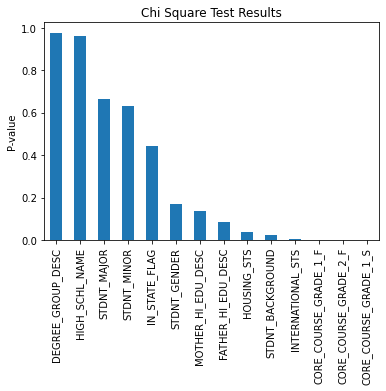

In [114]:
import seaborn as sns
p_values.plot.bar()
plt.title("Chi Square Test Results")
plt.ylabel("P-value")

Here, the null hypothesis states that there is no relationshp between the variables and the dependent variable. At a 5% significance level, it can be seen that the variables DEGREE_GROUP_DESC, HIGH_SCHL_NAME and STDNT_MINOR can be dropped. 

In [115]:
data.drop(["HIGH_SCHL_NAME", "STDNT_MINOR"], inplace = True, axis = 1)

### Quantitative Variables

In [116]:
import scipy.stats as stats

#### FIRST_TERM & SECOND_TERM

In [117]:
data["FIRST_TERM"].value_counts()

200908    676
201008    632
200808    581
200708    521
200608    497
200508    493
Name: FIRST_TERM, dtype: int64

In [118]:
pd.crosstab(data["RETURNED_2ND_YR"], data["FIRST_TERM"], margins = True)

FIRST_TERM,200508,200608,200708,200808,200908,201008,All
RETURNED_2ND_YR,,,,,,,
0,387,419,410,449,520,492,2677
1,106,78,111,132,156,140,723
All,493,497,521,581,676,632,3400


In [119]:
data["SECOND_TERM"].value_counts()

201002    676
201102    632
200902    581
200802    521
200702    497
200602    493
Name: SECOND_TERM, dtype: int64

In [120]:
pd.crosstab(data["RETURNED_2ND_YR"], data["SECOND_TERM"], margins = True)

SECOND_TERM,200602,200702,200802,200902,201002,201102,All
RETURNED_2ND_YR,,,,,,,
0,387,419,410,449,520,492,2677
1,106,78,111,132,156,140,723
All,493,497,521,581,676,632,3400


Here it can be seen that both the columns contain the same information. One of them will be dropped. 

In [121]:
data.drop("SECOND_TERM", inplace = True, axis = 1)

In [122]:
#Mapping first term variable 
def first_term(x):
    
    if x == 200508:
        
        return 2005
    
    elif x == 200608:
        
        return 2006
    
    elif x == 200708:
        
        return 2007
    
    elif x == 200808:
        
        return 2008
    
    elif x == 200908:
        
        return 2009
    
    elif x == 201008:
        
        return 2010

In [123]:
data["FIRST_TERM"] = data["FIRST_TERM"].map(first_term)

In [124]:
pd.crosstab(data["RETURNED_2ND_YR"], data["FIRST_TERM"], margins = True)

FIRST_TERM,2005,2006,2007,2008,2009,2010,All
RETURNED_2ND_YR,,,,,,,
0,387,419,410,449,520,492,2677
1,106,78,111,132,156,140,723
All,493,497,521,581,676,632,3400


In [125]:
print(f"Drop out rate in 2005 = {106/493}.")
print(f"Drop out rate in 2006 = {78/497}.")
print(f"Drop out rate in 2007 = {111/521}.")
print(f"Drop out rate in 2008 = {132/581}.")
print(f"Drop out rate in 2009 = {156/676}.")
print(f"Drop out rate in 2010 = {140/632}.")

Drop out rate in 2005 = 0.2150101419878296.
Drop out rate in 2006 = 0.15694164989939638.
Drop out rate in 2007 = 0.21305182341650672.
Drop out rate in 2008 = 0.22719449225473323.
Drop out rate in 2009 = 0.23076923076923078.
Drop out rate in 2010 = 0.22151898734177214.


Except for the year 2006, there seems to be a negligible difference in the drop-out rates across years. This variable will be dropped.

In [126]:
data.drop("FIRST_TERM", inplace = True, axis = 1)

In [127]:
#Extracting numerical features
numerical_continuous_variables = ["STDNT_AGE",
                      "DISTANCE_FROM_HOME", "HIGH_SCHL_GPA", "FIRST_TERM_ATTEMPT_HRS", "FIRST_TERM_EARNED_HRS",
                                  "SECOND_TERM_ATTEMPT_HRS", "SECOND_TERM_EARNED_HRS", "GROSS_FIN_NEED", "COST_OF_ATTEND",
                                  "EST_FAM_CONTRIBUTION", "UNMET_NEED"]

In [128]:
from sklearn import preprocessing

To visualise all the quantitative variables together in a boxplot, they will need to be scaled. This is shown below.

In [129]:
normalized_num_fea = pd.DataFrame(preprocessing.scale(data[numerical_continuous_variables]), columns= numerical_continuous_variables)

Text(0.5, 1.0, 'Box Plots of Quantitative Variables')

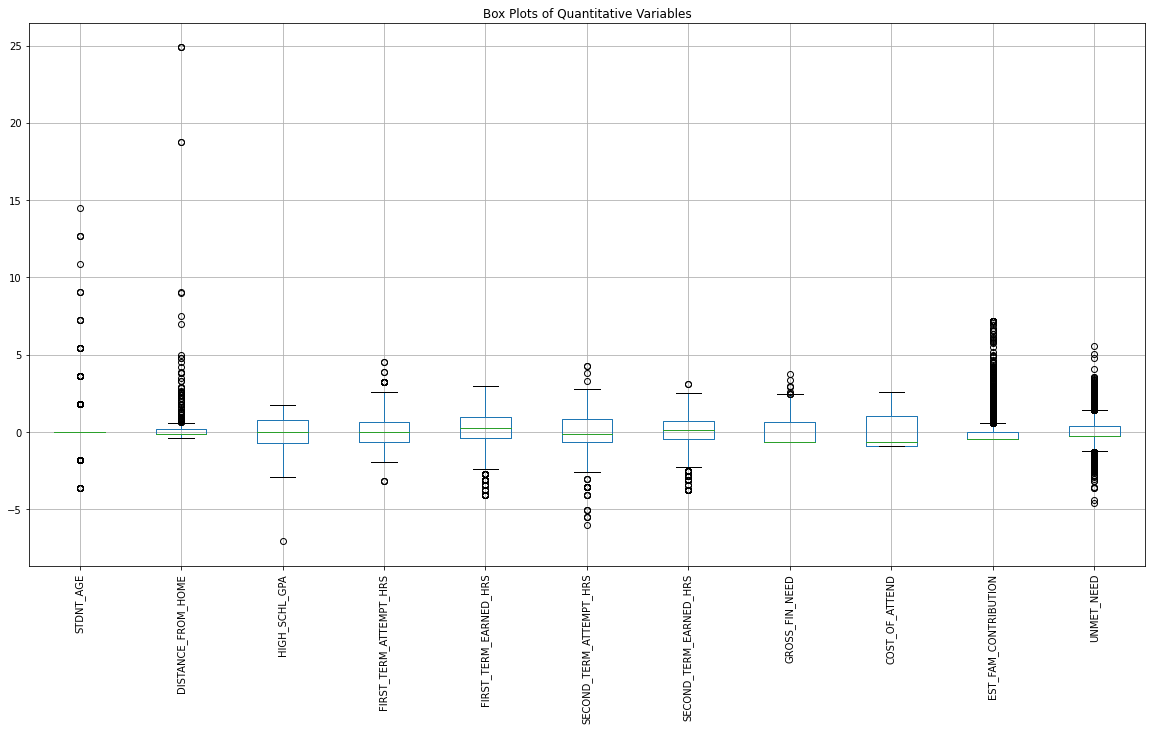

In [130]:
ax=normalized_num_fea.boxplot( figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Box Plots of Quantitative Variables')

Text(0.5, 1.0, 'Multi-Collinearity')

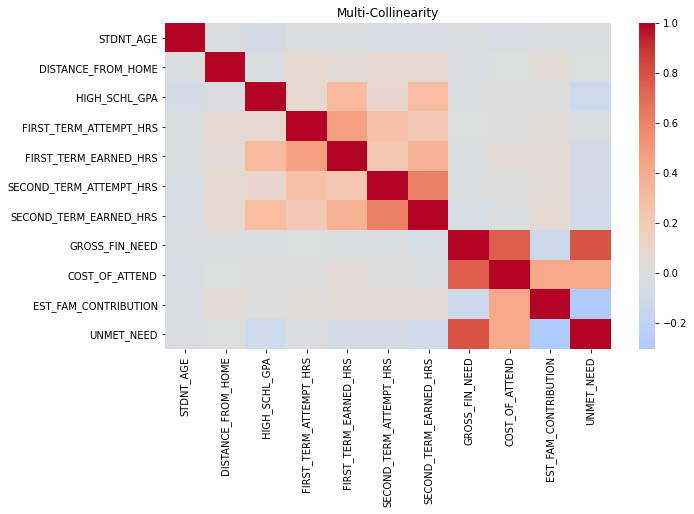

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(normalized_num_fea.corr(), center=0,cmap='coolwarm')
ax.set_title('Multi-Collinearity')

In [132]:
#Double checking missing values
data[numerical_continuous_variables].isnull().sum()/data.shape[0]

STDNT_AGE                  0.0
DISTANCE_FROM_HOME         0.0
HIGH_SCHL_GPA              0.0
FIRST_TERM_ATTEMPT_HRS     0.0
FIRST_TERM_EARNED_HRS      0.0
SECOND_TERM_ATTEMPT_HRS    0.0
SECOND_TERM_EARNED_HRS     0.0
GROSS_FIN_NEED             0.0
COST_OF_ATTEND             0.0
EST_FAM_CONTRIBUTION       0.0
UNMET_NEED                 0.0
dtype: float64

#### STDNT_AGE

<AxesSubplot:xlabel='STDNT_AGE', ylabel='Count'>

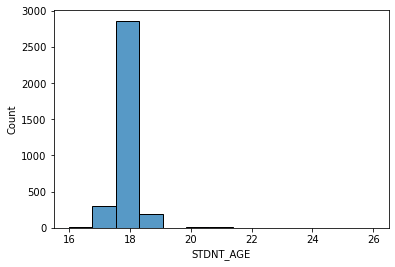

In [133]:
sns.histplot(data = data, x="STDNT_AGE")

In [134]:
data["STDNT_AGE"].value_counts()

18    2860
17     309
19     190
20      14
16       8
21       7
22       4
25       3
23       3
26       1
24       1
Name: STDNT_AGE, dtype: int64

In [135]:
data["STDNT_AGE"].describe()

count    3400.000000
mean       17.994118
std         0.552052
min        16.000000
25%        18.000000
50%        18.000000
75%        18.000000
max        26.000000
Name: STDNT_AGE, dtype: float64

In [136]:
low_age = data.query("STDNT_AGE < 18")
low_age["RETURNED_2ND_YR"].value_counts()/low_age.shape[0]

0    0.776025
1    0.223975
Name: RETURNED_2ND_YR, dtype: float64

In [137]:
high_age = data.query("STDNT_AGE > 18")
high_age["RETURNED_2ND_YR"].value_counts()/high_age.shape[0]

0    0.717489
1    0.282511
Name: RETURNED_2ND_YR, dtype: float64

The results show that students older than 18 have a drop-out rate of 28%, compared to a drop-out rate of 22% for students younger than 18. 

An ANOVA will now be performed to test for differences across means. This will be done for each quantitative variable.

In [138]:
#Examining attrition rate by age
left = data.query("RETURNED_2ND_YR == 1")["STDNT_AGE"]
stay = data.query("RETURNED_2ND_YR == 0")["STDNT_AGE"]

In [139]:
stats.f_oneway(left, stay)

F_onewayResult(statistic=1.3411697792033888, pvalue=0.2469091696622737)

Here, the p-value shows that there is no significant difference across means. This indicates that age is not a contributing factor to the drop out rate. However, it is still an important variable. The model will be run with and without it. The best performing model will then be chosen.

#### DISTANCE_FROM_HOME

In [140]:
data["DISTANCE_FROM_HOME"].describe()

count    3400.000000
mean       99.598529
std       234.345241
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

The maximum value of 5932 will not be considered as an outlier as it can be explained by international students who live in foreign countries. The minimum 0 will not be considered an outlier as it can be explained by in-state students. 

<AxesSubplot:xlabel='DISTANCE_FROM_HOME', ylabel='Count'>

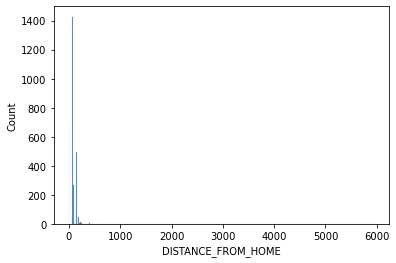

In [141]:
sns.histplot(x = "DISTANCE_FROM_HOME", data = data)

The affect of DISTANCE_FROM_HOME on the target variable will now be examined by querying the data according to its quartiles. (Q1 and Q3)

In [142]:
low_distance = data.query("DISTANCE_FROM_HOME < 69")
low_distance["RETURNED_2ND_YR"].value_counts()/low_distance.shape[0]

0    0.812155
1    0.187845
Name: RETURNED_2ND_YR, dtype: float64

In [143]:
high_distance = data.query("DISTANCE_FROM_HOME > 138")
high_distance["RETURNED_2ND_YR"].value_counts()/high_distance.shape[0]

0    0.767733
1    0.232267
Name: RETURNED_2ND_YR, dtype: float64

Here we see that student's whose homes are closer to the university have a lower chance of dropping out after the first year in university. 

In [144]:
#Examining attrition rate by distance from home
left = data.query("RETURNED_2ND_YR == 1")["DISTANCE_FROM_HOME"]
stay = data.query("RETURNED_2ND_YR == 0")["DISTANCE_FROM_HOME"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=2.416166104932261, pvalue=0.12018164269756056)

Here, the p-value shows that there is no significant difference across means. This indicates that distance from home is not a contributing factor to the drop out rate. Once again however, this seems like an important factor for the university to consider. The model will be run with and without this variable, and differences noted. 

#### HIGH_SCHL_GPA

In [145]:
data["HIGH_SCHL_GPA"].describe()

count    3400.000000
mean        3.202695
std         0.451773
min         0.000000
25%         2.870000
50%         3.200000
75%         3.550000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

<AxesSubplot:xlabel='HIGH_SCHL_GPA', ylabel='Count'>

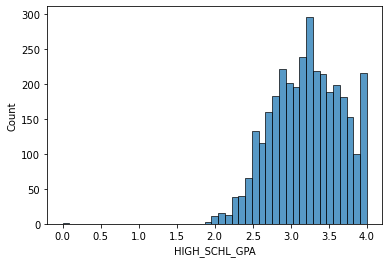

In [146]:
sns.histplot(x = "HIGH_SCHL_GPA", data = data)

The affects of GPA on attrition rate will be examined looking at the quartiles. Data will be queried according to the quartiles (Q1, Q2 and Q3) in an attempt to spot any changes in the attrition rate.

In [147]:
low_GPA = data.query("HIGH_SCHL_GPA < 2.87")

In [148]:
low_GPA["RETURNED_2ND_YR"].value_counts()/low_GPA.shape[0]

0    0.764706
1    0.235294
Name: RETURNED_2ND_YR, dtype: float64

In [149]:
med_GPA = data.query("HIGH_SCHL_GPA < 3.2")
med_GPA["RETURNED_2ND_YR"].value_counts()/med_GPA.shape[0]

0    0.76208
1    0.23792
Name: RETURNED_2ND_YR, dtype: float64

Text(-2.700000000000003, 0.5, 'Count')

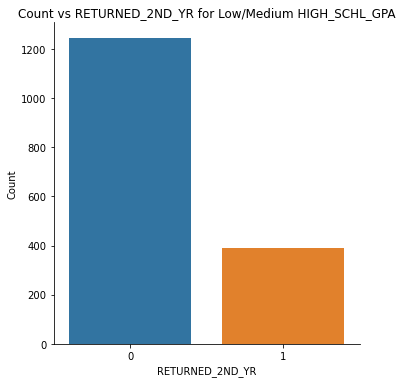

In [150]:
sns.catplot(x="RETURNED_2ND_YR",data=med_GPA, kind = "count")
plt.title("Count vs RETURNED_2ND_YR for Low/Medium HIGH_SCHL_GPA")
plt.ylabel("Count")

In [151]:
high_GPA = data.query("HIGH_SCHL_GPA > 3.56")
high_GPA["RETURNED_2ND_YR"].value_counts()/high_GPA.shape[0]

0    0.840244
1    0.159756
Name: RETURNED_2ND_YR, dtype: float64

Text(3.674999999999997, 0.5, 'Count')

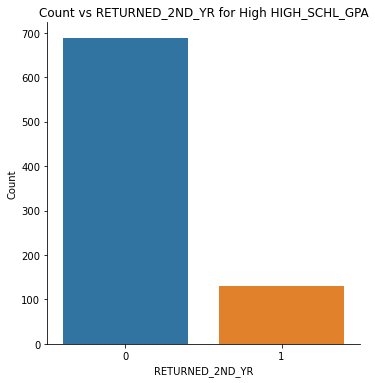

In [152]:
sns.catplot(x="RETURNED_2ND_YR",data=high_GPA, kind = "count")
plt.title("Count vs RETURNED_2ND_YR for High HIGH_SCHL_GPA")
plt.ylabel("Count")

This has yielded some interesting results. Students with medium to low High School GPAs are almost 10% more likely to drop out as compared to students with high GPA's.

In [153]:
#Examining attrition rate by GPA
left = data.query("RETURNED_2ND_YR == 1")["HIGH_SCHL_GPA"]
stay = data.query("RETURNED_2ND_YR == 0")["HIGH_SCHL_GPA"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=21.85161972410871, pvalue=3.060172391532888e-06)

Results from the ANOVA suggests a difference in high school GPA between students who dropped out and students who didn't. 

#### FIRST_TERM_ATTEMPT_HRS & FIRST_TERM_EARNED_HRS

In [154]:
data["FIRST_TERM_ATTEMPT_HRS"].describe()

count    3400.000000
mean       13.985882
std         1.554286
min         9.000000
25%        13.000000
50%        14.000000
75%        15.000000
max        21.000000
Name: FIRST_TERM_ATTEMPT_HRS, dtype: float64

<AxesSubplot:xlabel='FIRST_TERM_ATTEMPT_HRS', ylabel='Count'>

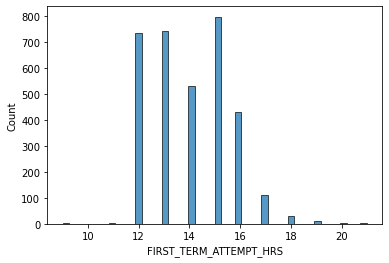

In [155]:
sns.histplot(x = "FIRST_TERM_ATTEMPT_HRS", data = data)

In [156]:
data["FIRST_TERM_EARNED_HRS"].describe()

count    3400.000000
mean       12.205000
std         2.986294
min         0.000000
25%        11.000000
50%        13.000000
75%        15.000000
max        21.000000
Name: FIRST_TERM_EARNED_HRS, dtype: float64

<AxesSubplot:xlabel='FIRST_TERM_EARNED_HRS', ylabel='Count'>

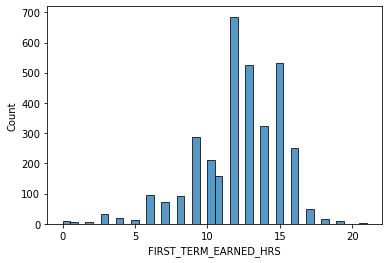

In [157]:
sns.histplot(x = "FIRST_TERM_EARNED_HRS", data = data)

In [158]:
data[["FIRST_TERM_ATTEMPT_HRS", "FIRST_TERM_EARNED_HRS"]].corr()

,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS
FIRST_TERM_ATTEMPT_HRS,1.000000,0.466185
FIRST_TERM_EARNED_HRS,0.466185,1.000000


In [159]:
low_hours = data.query("FIRST_TERM_ATTEMPT_HRS < 13 & FIRST_TERM_EARNED_HRS < 11")
low_hours["RETURNED_2ND_YR"].value_counts()/low_hours.shape[0]

0    0.717842
1    0.282158
Name: RETURNED_2ND_YR, dtype: float64

In [160]:
high_hours = data.query("FIRST_TERM_ATTEMPT_HRS > 15 & FIRST_TERM_EARNED_HRS > 15")
high_hours["RETURNED_2ND_YR"].value_counts()/high_hours.shape[0]

0    0.792683
1    0.207317
Name: RETURNED_2ND_YR, dtype: float64

#### SECOND_TERM_ATTEMPT_HRS & SECOND_TERM_HRS

In [161]:
data["SECOND_TERM_ATTEMPT_HRS"].describe()

count    3400.000000
mean       14.268529
std         2.040761
min         2.000000
25%        13.000000
50%        14.000000
75%        16.000000
max        23.000000
Name: SECOND_TERM_ATTEMPT_HRS, dtype: float64

<AxesSubplot:xlabel='SECOND_TERM_ATTEMPT_HRS', ylabel='Count'>

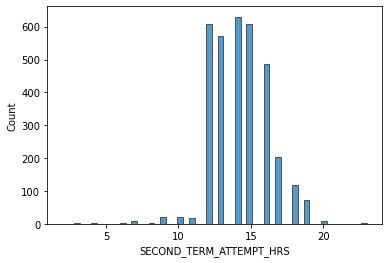

In [162]:
sns.histplot(x = "SECOND_TERM_ATTEMPT_HRS", data = data)

In [163]:
data["SECOND_TERM_EARNED_HRS"].describe()

count    3400.000000
mean       12.541176
std         3.364152
min         0.000000
25%        11.000000
50%        13.000000
75%        15.000000
max        23.000000
Name: SECOND_TERM_EARNED_HRS, dtype: float64

In [164]:
low_hours = data.query("SECOND_TERM_ATTEMPT_HRS < 13 & SECOND_TERM_EARNED_HRS < 11")
low_hours["RETURNED_2ND_YR"].value_counts()/low_hours.shape[0]

0    0.701031
1    0.298969
Name: RETURNED_2ND_YR, dtype: float64

In [165]:
high_hours = data.query("SECOND_TERM_ATTEMPT_HRS > 16 & SECOND_TERM_EARNED_HRS > 15")
high_hours["RETURNED_2ND_YR"].value_counts()/low_hours.shape[0]

0    0.800687
1    0.134021
Name: RETURNED_2ND_YR, dtype: float64

In [166]:
data[["SECOND_TERM_ATTEMPT_HRS", "SECOND_TERM_EARNED_HRS"]].corr()

,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS
SECOND_TERM_ATTEMPT_HRS,1.00000,0.61048
SECOND_TERM_EARNED_HRS,0.61048,1.00000


Text(0.5, 1.0, 'Attempted and Earned Hours Multi-Collinearity')

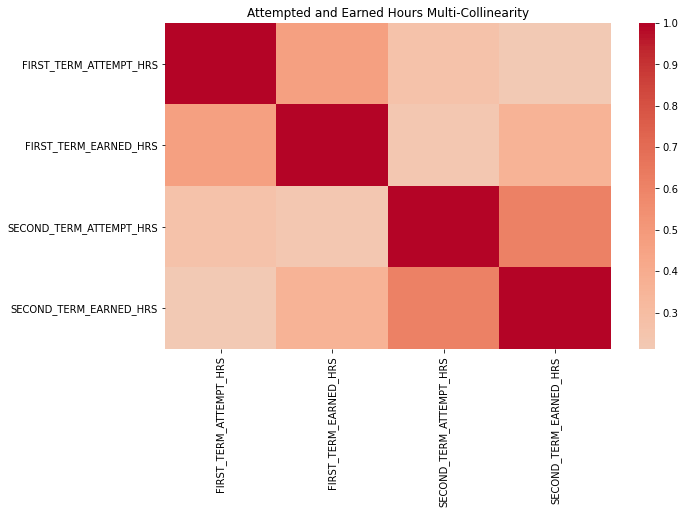

In [167]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data[["FIRST_TERM_ATTEMPT_HRS", "FIRST_TERM_EARNED_HRS", "SECOND_TERM_ATTEMPT_HRS", "SECOND_TERM_EARNED_HRS"]].corr(), center=0,cmap='coolwarm')
ax.set_title('Attempted and Earned Hours Multi-Collinearity')

In [168]:
low_hours = data.query("FIRST_TERM_ATTEMPT_HRS < 13 & FIRST_TERM_EARNED_HRS < 11 & SECOND_TERM_ATTEMPT_HRS < 13 & SECOND_TERM_EARNED_HRS < 11")
low_hours["RETURNED_2ND_YR"].value_counts()/low_hours.shape[0]

0    0.65
1    0.35
Name: RETURNED_2ND_YR, dtype: float64

Text(10.049999999999997, 0.5, 'Count')

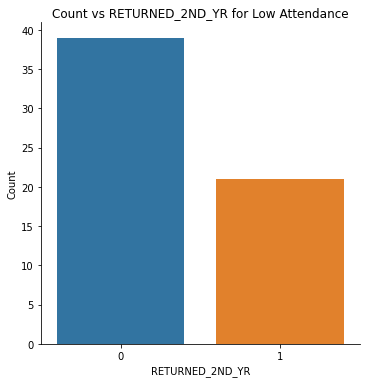

In [169]:
sns.catplot(x="RETURNED_2ND_YR",data=low_hours, kind = "count")
plt.title("Count vs RETURNED_2ND_YR for Low Attendance")
plt.ylabel("Count")

In [170]:
high_hours = data.query("FIRST_TERM_ATTEMPT_HRS > 15 & FIRST_TERM_EARNED_HRS > 15 & SECOND_TERM_ATTEMPT_HRS > 16 & SECOND_TERM_EARNED_HRS > 15")
high_hours["RETURNED_2ND_YR"].value_counts()/high_hours.shape[0]

0    0.857143
1    0.142857
Name: RETURNED_2ND_YR, dtype: float64

Text(10.049999999999997, 0.5, 'Count')

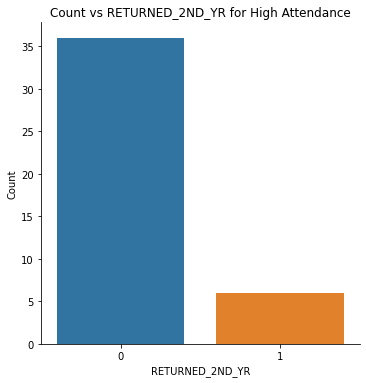

In [171]:
sns.catplot(x="RETURNED_2ND_YR",data=high_hours, kind = "count")
plt.title("Count vs RETURNED_2ND_YR for High Attendance")
plt.ylabel("Count")

Here we can see that students with high attendence rates are significantly less likely to drop out. 

In [172]:
#Examining the attrition rate by First Term Attempt Hours
left = data.query("RETURNED_2ND_YR == 1")["FIRST_TERM_ATTEMPT_HRS"]
stay = data.query("RETURNED_2ND_YR == 0")["FIRST_TERM_ATTEMPT_HRS"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=0.00354103965821567, pvalue=0.9525520797783985)

In [173]:
#Examining the attrition rate by First Term Earned Hours
left = data.query("RETURNED_2ND_YR == 1")["FIRST_TERM_EARNED_HRS"]
stay = data.query("RETURNED_2ND_YR == 0")["FIRST_TERM_EARNED_HRS"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=16.208800137484204, pvalue=5.7968600433273296e-05)

In [174]:
#Examining the attrition rate by Second Term Attempt Hours
left = data.query("RETURNED_2ND_YR == 1")["SECOND_TERM_ATTEMPT_HRS"]
stay = data.query("RETURNED_2ND_YR == 0")["SECOND_TERM_ATTEMPT_HRS"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=25.531923998470234, pvalue=4.580775099911911e-07)

In [175]:
#Examining the attrition rate by Second Term Earned Hours
left = data.query("RETURNED_2ND_YR == 1")["SECOND_TERM_EARNED_HRS"]
stay = data.query("RETURNED_2ND_YR == 0")["SECOND_TERM_EARNED_HRS"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=39.6023647578572, pvalue=3.510778346200739e-10)

The results show that apart from FIRST_TERM_ATTEMPT_HRS, there is a significant difference in attendance rate between the means of students who drop out versus those who don't.

#### GROSS_FIN_NEED

In [176]:
data["GROSS_FIN_NEED"].describe()

count    3.400000e+03
mean     3.034025e+05
std      4.836255e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.995800e+05
max      2.124900e+06
Name: GROSS_FIN_NEED, dtype: float64

<AxesSubplot:xlabel='GROSS_FIN_NEED', ylabel='Count'>

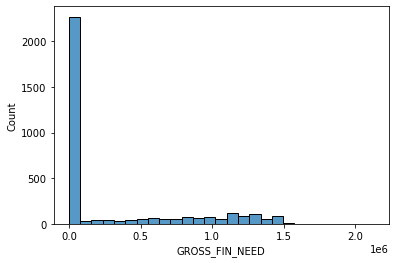

In [177]:
sns.histplot(x = "GROSS_FIN_NEED", data = data)

In [178]:
#Examining the attrition rate by Gross Fin Needed
left = data.query("RETURNED_2ND_YR == 1")["GROSS_FIN_NEED"]
stay = data.query("RETURNED_2ND_YR == 0")["GROSS_FIN_NEED"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=0.05789396898787058, pvalue=0.8098706307469362)

The results show that the majority of values for this variable is 0. Additionally, results from the ANOVA test show that this variable is not related to the attrition rate - there is no significant difference between the means for students who drop out versus those who don't.

#### COST_OF_ATTEND

In [179]:
data["COST_OF_ATTEND"].describe()

count    3.400000e+03
mean     5.515335e+05
std      6.064403e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.505400e+05
75%      1.192815e+06
max      2.124900e+06
Name: COST_OF_ATTEND, dtype: float64

<AxesSubplot:xlabel='COST_OF_ATTEND', ylabel='Count'>

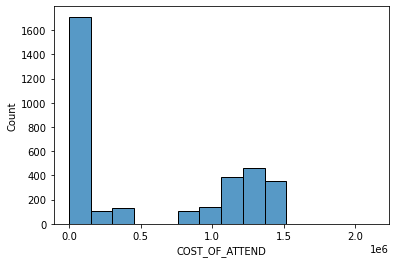

In [180]:
sns.histplot(x = "COST_OF_ATTEND", data = data)

In [181]:
high_cost_attend = data.query("COST_OF_ATTEND > 1192815")
high_cost_attend["RETURNED_2ND_YR"].value_counts()/high_cost_attend.shape[0]

0    0.804706
1    0.195294
Name: RETURNED_2ND_YR, dtype: float64

In [182]:
low_cost_attend = data.query("COST_OF_ATTEND == 0")
low_cost_attend["RETURNED_2ND_YR"].value_counts()/low_cost_attend.shape[0]

0    0.793329
1    0.206671
Name: RETURNED_2ND_YR, dtype: float64

Majority of values are 0. Additionally, there does not seem to be any change in attrition rates between high and low costs of attending.

In [183]:
#Examining the attrition rate by Cost of Attend
left = data.query("RETURNED_2ND_YR == 1")["COST_OF_ATTEND"]
stay = data.query("RETURNED_2ND_YR == 0")["COST_OF_ATTEND"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=0.01561726168987039, pvalue=0.9005554506782609)

Results from the ANOVA show that this variable can be dropped. 

#### EST_FAM_CONTRIBUTION

In [184]:
data["EST_FAM_CONTRIBUTION"].describe()

count    3.400000e+03
mean     3.446899e+05
std      7.871878e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.241800e+05
max      5.999940e+06
Name: EST_FAM_CONTRIBUTION, dtype: float64

<AxesSubplot:xlabel='EST_FAM_CONTRIBUTION', ylabel='Count'>

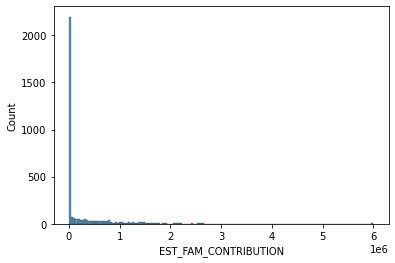

In [185]:
sns.histplot(x = "EST_FAM_CONTRIBUTION", data = data)

In [186]:
low_contribution = data.query("EST_FAM_CONTRIBUTION == 0")
low_contribution["RETURNED_2ND_YR"].value_counts()/low_contribution.shape[0]

0    0.784091
1    0.215909
Name: RETURNED_2ND_YR, dtype: float64

In [187]:
high_contribution = data.query("EST_FAM_CONTRIBUTION > 0")
high_contribution["RETURNED_2ND_YR"].value_counts()/high_contribution.shape[0]

0    0.792702
1    0.207298
Name: RETURNED_2ND_YR, dtype: float64

Majority of values are 0. No observable difference between attrition rates across different levels. This variable can be dropped.

In [188]:
#Examining the attrition rate by Est Fam Contribution
left = data.query("RETURNED_2ND_YR == 1")["EST_FAM_CONTRIBUTION"]
stay = data.query("RETURNED_2ND_YR == 0")["EST_FAM_CONTRIBUTION"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=1.2830986034019383, pvalue=0.2574036165450643)

Results from the ANOVA show that this variable can be dropped. 

#### UNMET_NEED

In [189]:
data["UNMET_NEED"].describe()

count    3.400000e+03
mean     7.222052e+04
std      2.795679e+05
min     -1.212072e+06
25%      0.000000e+00
50%      0.000000e+00
75%      1.876155e+05
max      1.632660e+06
Name: UNMET_NEED, dtype: float64

<AxesSubplot:xlabel='UNMET_NEED', ylabel='Count'>

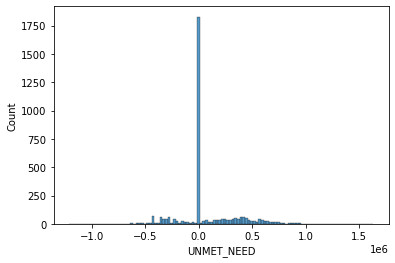

In [190]:
sns.histplot(x = "UNMET_NEED", data = data)

In [191]:
unmet_high = data.query("UNMET_NEED > 187615")
unmet_high["RETURNED_2ND_YR"].value_counts()/unmet_high.shape[0]

0    0.776471
1    0.223529
Name: RETURNED_2ND_YR, dtype: float64

In [192]:
unmet_low = data.query("UNMET_NEED <= 0")
unmet_low["RETURNED_2ND_YR"].value_counts()/unmet_low.shape[0]

0    0.790521
1    0.209479
Name: RETURNED_2ND_YR, dtype: float64

No observable difference. This variable can be dropped. Additionally, there exist negative values which cannot be accounted for. Simply imputing them for the median or other values may lose some intrinsic value. 

In [193]:
#Examining the attrition rate byUnMet Need
left = data.query("RETURNED_2ND_YR == 1")["UNMET_NEED"]
stay = data.query("RETURNED_2ND_YR == 0")["UNMET_NEED"]
stats.f_oneway(left, stay)

F_onewayResult(statistic=4.006746688664832, pvalue=0.04539787970096459)

The model will be ran with and without this variable - results will be noted. Better performing models will be chosen.

In [194]:
#Separating independent variable from dependent variables
X = pd.get_dummies(data.drop("RETURNED_2ND_YR", axis = 1))
y = data["RETURNED_2ND_YR"]

In [195]:
X.shape

(3400, 46)

In [196]:
y.shape

(3400,)

In [197]:
#Split datasets into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [198]:
#Build model
#NOTE: This final model was produced as the result of multiple iterations of model building
#including different variables, buckets and model types. This model had the best results.
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [199]:
#When loss = exponential, model uses Ada Boost Classifier
gb = GradientBoostingClassifier()

In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
model = GridSearchCV(gb, param_grid = {"n_estimators": [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]})
model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})

In [202]:
gbc = model.best_estimator_
gbc

GradientBoostingClassifier(n_estimators=40)

In [203]:
gbc.score(X_test, y_test)

0.85

In [204]:
#Area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])

0.7453706293706294

In [205]:
pd.Series(gbc.feature_importances_, index = X_train.columns).sort_values(ascending = False)

CORE_COURSE_GRADE_1_S_F&OTHER         0.394151
SECOND_TERM_EARNED_HRS                0.164998
SECOND_TERM_ATTEMPT_HRS               0.161406
DISTANCE_FROM_HOME                    0.037784
FIRST_TERM_EARNED_HRS                 0.036101
UNMET_NEED                            0.032484
HIGH_SCHL_GPA                         0.019773
CORE_COURSE_GRADE_1_S_D               0.013798
INTERNATIONAL_STS                     0.013310
COST_OF_ATTEND                        0.012642
STDNT_BACKGROUND_BGD 1                0.010697
GROSS_FIN_NEED                        0.010671
CORE_COURSE_GRADE_2_F_B               0.009697
STDNT_GENDER                          0.008320
CORE_COURSE_GRADE_1_F_D               0.007948
STDNT_MAJOR_MS                        0.007943
HOUSING_STS                           0.007024
CORE_COURSE_GRADE_1_S_B               0.007016
CORE_COURSE_GRADE_1_F_B               0.005942
EST_FAM_CONTRIBUTION                  0.005051
CORE_COURSE_GRADE_1_F_C               0.004968
IN_STATE_FLAG